# Problem Statement
* The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.

* Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   

* There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    

* Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

* Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying

# Data

* The dataset was provided buy flip robo technologies

# Features

* The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 

* The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   

 The data set includes:
* 1.Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
* 2.Highly Malignant: It denotes comments that are highly malignant and hurtful. 
* 3.Rude: It denotes comments that are very rude and offensive.
* 4.Threat: It contains indication of the comments that are giving any threat to someone. 	
* 5.Abuse: It is for comments that are abusive in nature. 
* 6.Loathe: It describes the comments which are hateful and loathing in nature.  
* 7.ID: It includes unique Ids associated with each comment text given.   
* 8.Comment text: This column contains the comments extracted from various social media platforms. 



## Getting tools ready

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


### Missing values

In [4]:
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [5]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

* There are no missing values here

# Data cleaning

In [6]:
def cleaning_text(data):
    """
    It replaces all the non alpha characters with space, replacing brackets, removing html tags, replacing next line spaces, replacing multiple line spaces and _ wit single space bar only,for characters like aren't I will replace n't with not, lower case   
    """
    for i in range(len(df_train)):
        
        #replacing all non alpha charcaters with space
        data = re.sub('[^a-zA-Z]', ' ',data) 
        
        #replacing brackets
        data = re.sub('\[|\]', ' ', data)   #replacing brackets
        
        #removing htlm tags
        data = re.sub('https?://\S+|www\.\S+', '', data)  
        
        #replacing next line spaces
        data = re.sub('\n', '', data)  
        
        #replacing multiple line spaces and _ with single space bar only
        data = re.sub(' +|_+', ' ', data)   
        
        #for characters like aren't I will replace n't with not
        data = re.sub('n\st',' not',data)  
        
        #lower case
        data = data.lower() 
        return data

In [8]:
df_train['comment_text'] = df_train['comment_text'].apply(cleaning_text)

In [10]:
df_test['comment_text'] = df_test['comment_text'].apply(cleaning_text)

In [24]:
corpus_train = []

def pre_process_train(start,end, data):
    for i in range(start,end):
        review = data['comment_text'][i] #from each row of message only keeping element which starts with albhabet
        review = word_tokenize(review)
        words = []
        for word in review:
            if len(word)>2:
                words.append(word)
        review_length = words

        word_lemmatize = []
        for wrd in review_length:
            if wrd not in set(stopwords.words('english')):
                word_lemmatize.append(WordNetLemmatizer().lemmatize(wrd))

        review_lemmatise = word_lemmatize
        review = ' '.join(review_lemmatise)          
        
        corpus_train.append(review)
        

In [25]:
pre_process_train(0, 159571, df_train)

In [17]:
df_test.drop('id', axis = 1, inplace = True)

In [26]:
len(corpus_train)

159571

In [27]:
import json
with open("corpus_train.txt", "w") as fp:
    json.dump(corpus_train, fp)

In [29]:
corpus_test = []

def pre_process_test(start,end, data):
    for i in range(start,end):
        review = data['comment_text'][i] #from each row of message only keeping element which starts with albhabet
        review = word_tokenize(review)
        words = []
        for word in review:
            if len(word)>2:
                words.append(word)
        review_length = words

        word_lemmatize = []
        for wrd in review_length:
            if wrd not in set(stopwords.words('english')):
                word_lemmatize.append(WordNetLemmatizer().lemmatize(wrd))

        review_lemmatise = word_lemmatize
        review = ' '.join(review_lemmatise)          
        
        corpus_test.append(review)

In [30]:
pre_process_test(0, 153164, df_test)

In [31]:
import json
with open("corpus_test.txt", "w") as fp:
    json.dump(corpus_test, fp)

In [32]:
clean_comment = pd.DataFrame(corpus_train)

In [34]:
df_train['clean_comment'] = clean_comment
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,d aww he matches this background colour i m se...,0,0,0,0,0,0,aww match background colour seemingly stuck th...
2,000113f07ec002fd,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,0001b41b1c6bb37e,more i ca not make any real suggestions on im...,0,0,0,0,0,0,make real suggestion improvement wondered sect...
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,sir hero chance remember page


In [35]:
df_train.drop('id', axis = 1, inplace = True)

In [36]:
df_train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment
0,explanation why the edits made under my userna...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,d aww he matches this background colour i m se...,0,0,0,0,0,0,aww match background colour seemingly stuck th...
2,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,more i ca not make any real suggestions on im...,0,0,0,0,0,0,make real suggestion improvement wondered sect...
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,sir hero chance remember page


In [37]:
test_clean_comment = pd.DataFrame(corpus_test)

df_test['clean_comment'] = test_clean_comment
df_test.head()

,comment_text,clean_comment
0,yo bitch ja rule is more succesful then you ll...,bitch rule succesful ever whats hating sad mof...
1,from rfc the title is fine as it is imo,rfc title fine imo
2,sources zawe ashton on lapland,source zawe ashton lapland
3,if you have a look back at the source the inf...,look back source information updated correct f...
4,i do not anonymously edit articles at all,anonymously edit article


# Data visualization

In [40]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\mussa\anaconda3\python.exe -m pip install --upgrade pip' command.


In [41]:
mal_data = pd.DataFrame(df_train[df_train['malignant']==1]['clean_comment'])
high_mal_data = pd.DataFrame(df_train[df_train['highly_malignant']==1]['clean_comment'])
rude_data = pd.DataFrame(df_train[df_train['rude']==1]['clean_comment'])
threat_data = pd.DataFrame(df_train[df_train['threat']==1]['clean_comment'])
abuse_data = pd.DataFrame(df_train[df_train['abuse']==1]['clean_comment'])
loathe_data = pd.DataFrame(df_train[df_train['loathe']==1]['clean_comment'])

In [46]:

def wordcloud(data,label_type):
    comment_words = ''
    stopwords = set(STOPWORDS)


    for val in data.clean_comment:
      
    # typecaste each val to string
        val = str(val)
  
    # split the value
        tokens = val.split()
      
    # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
      
        comment_words += " ".join(tokens)+" "
    
    cloud = WordCloud(width=700,height=500,max_words=50,mode="RGBA",prefer_horizontal=1,collocations=False).generate(comment_words)
    plt.figure(figsize=(10,8),facecolor='r')
    plt.imshow(cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title("top 50 {} words".format(label_type))
    plt.show()

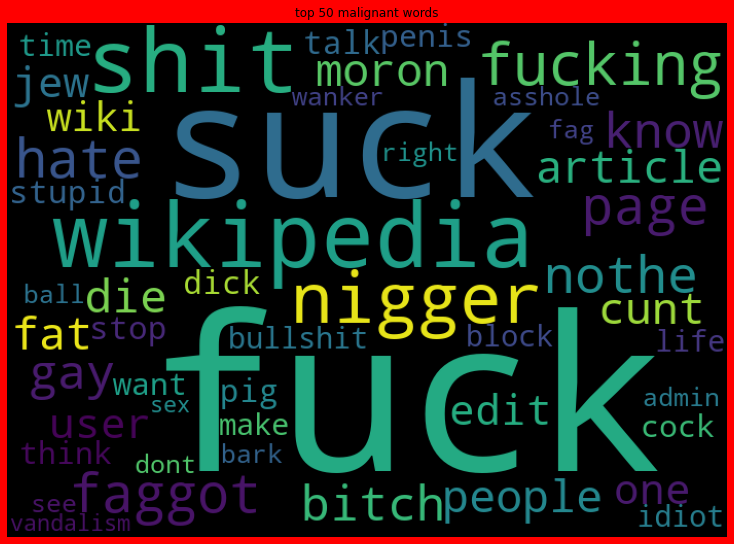

In [47]:
wordcloud(mal_data,'malignant')

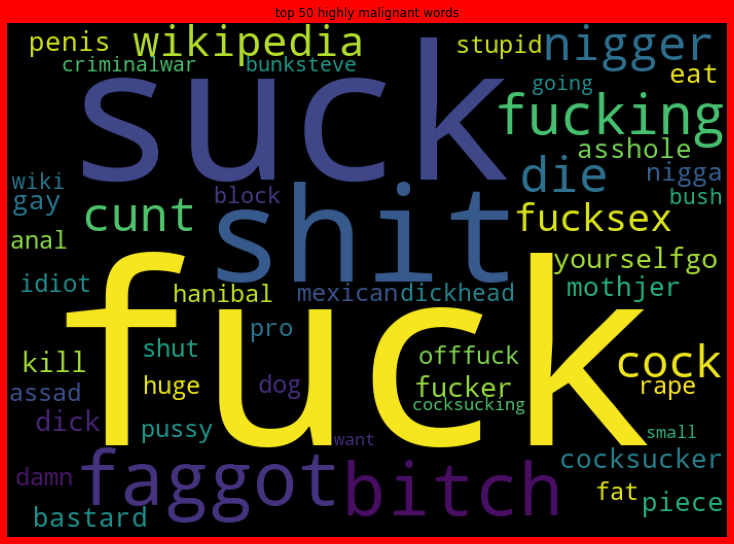

In [48]:
wordcloud(high_mal_data,'highly malignant')

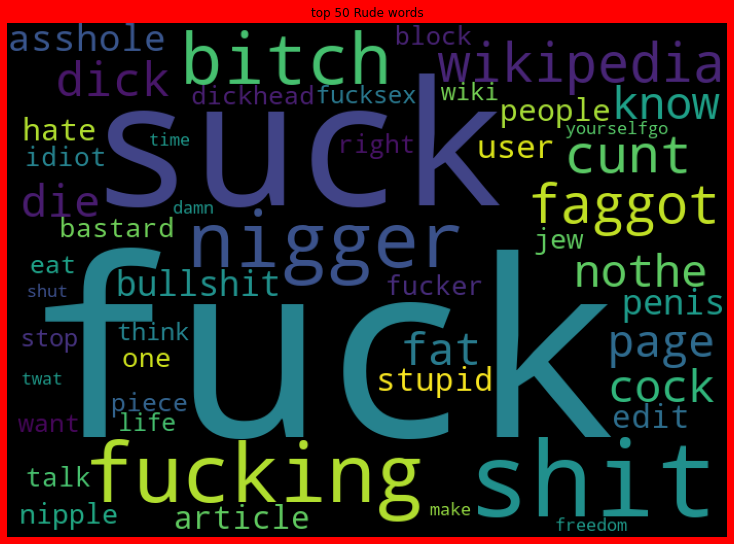

In [49]:
wordcloud(rude_data,'Rude')

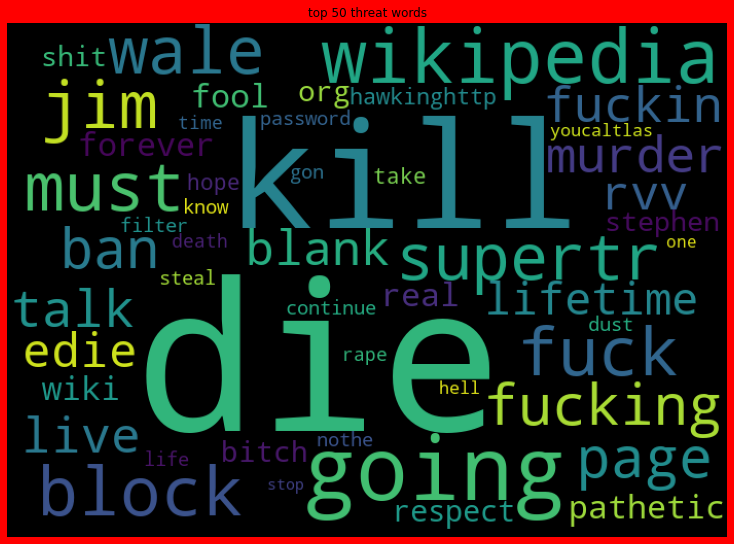

In [50]:
wordcloud(threat_data,'threat')

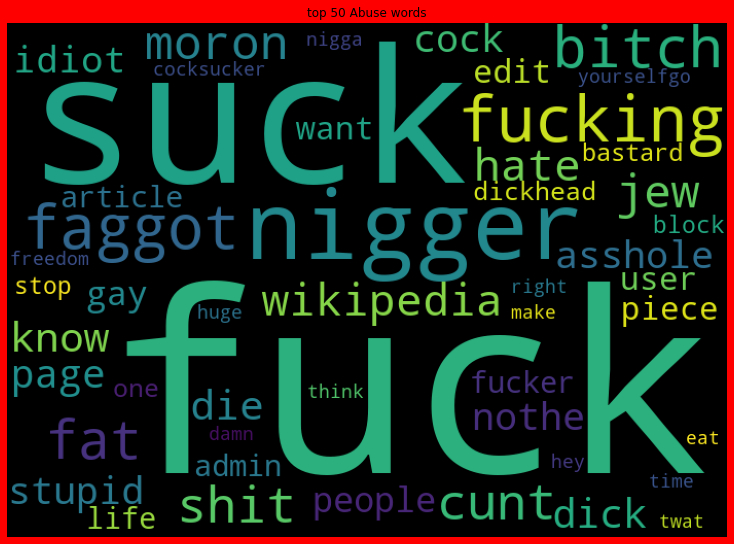

In [51]:
wordcloud(abuse_data,'Abuse')

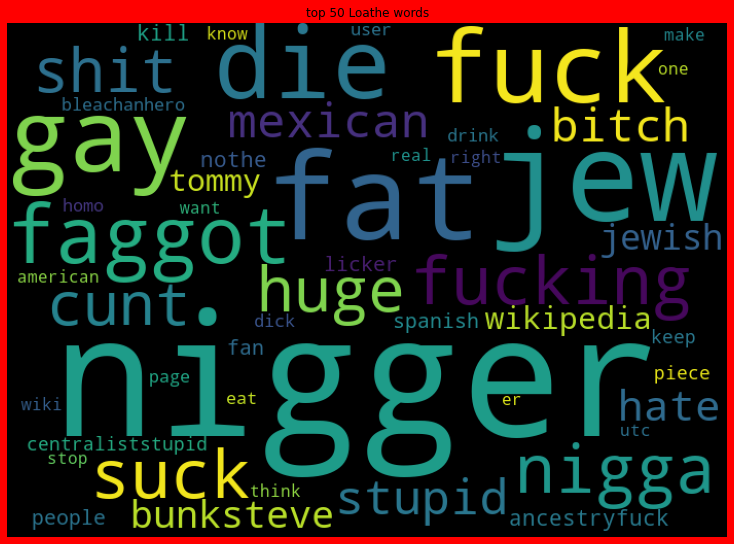

In [52]:
wordcloud(loathe_data,'Loathe')

In [53]:
df_train.to_csv('final_train.csv')
df_test.to_csv('final_test.csv')